# Regresión Logística

Regresión logística aplicada a un subconjunto del Iris-DataSet

Importación de bibliotecas

In [125]:
import os
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.linear_model import LogisticRegression
import importlib.util
from mpl_toolkits.mplot3d import Axes3D

Carga del dataset

In [126]:
skdf = datasets.load_iris(as_frame=False)
df = pd.DataFrame(skdf["data"], columns=skdf['feature_names']) 
target = pd.Series(skdf["target"], name="target")
df = df.join(target)

Me quedo solo con las columnas que voy a utilizar en el ejemplo y con solo dos tipos de flores, 0 y 1.

In [127]:
df = df.loc[df.target!=2, ['petal length (cm)', 'petal width (cm)', 'target']]

Divido en predictoras y target

In [128]:
X_train = df[['petal length (cm)', 'petal width (cm)']].values
y_train = df['target'].values

Aplico regresión logística "de fabrica"

In [129]:
clf = LogisticRegression()
clf.fit(X_train, y_train)   


LogisticRegression()

Analizo las regiones, si no tiene la biblioteca "mlxtend" instalada en su entorno, simplemente se ignora el ploteo.

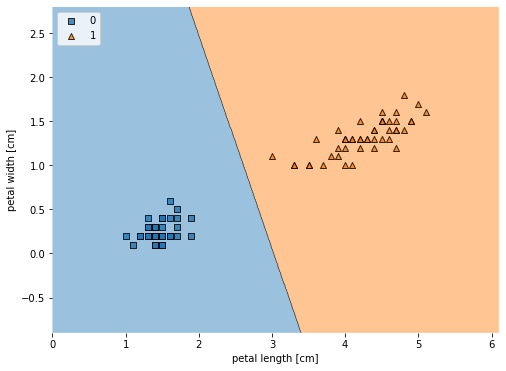

In [130]:
spec = importlib.util.find_spec("mlxtend")
if spec is not None:
    from mlxtend.plotting import plot_decision_regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train, y_train, clf=clf)
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.show()
else:
    print("Biblioteca de visualizacion de regiones no instalada")
    

Espío la sigmoide resultante. Estamos siendo displicentes, los datos debieron ser estandarizados. 

In [131]:
print(clf.coef_, clf.intercept_)

[[2.58270141 1.06902867]] [-7.80845974]


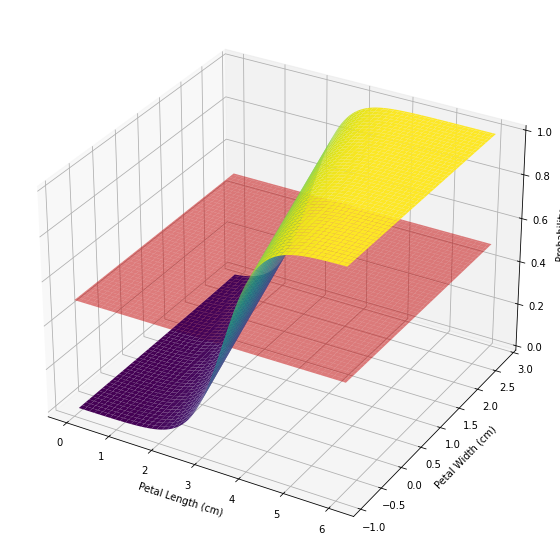

In [132]:
# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the probability for each point in the mesh grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the 3D sigmoid function
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='viridis', edgecolor='none')


# Add a plane at z=0.5
z_plane = np.full(xx.shape, 0.5)
ax.plot_surface(xx, yy, z_plane, color='red', alpha=0.5)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Probability')
plt.xscale('linear')
plt.show()

Peso de los W según regularización (En revisión)

In [121]:
ws = []
params = []
for i in np.arange(-5, 5):
    clf = LogisticRegression(C=10.**i, random_state=0)
    clf.fit(X_train, y_train) 
    ws.append(clf.coef_.ravel())
    params.append(10.**i)


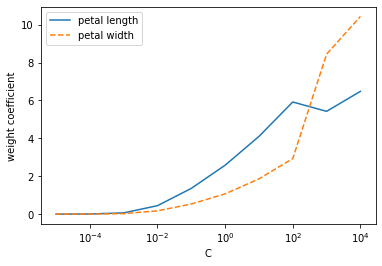

In [122]:
weights = np.array(ws)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()